In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

uber_raw_df = pd.read_csv('uberCSV/uber-raw-data-apr14.csv')

weather_raw_df = pd.read_csv('Data/NewYorkWeatherData_2014_2015.csv')

In [2]:
uber_raw_df['Date/Time'] = pd.to_datetime(uber_raw_df['Date/Time'])

uber_raw_df['Time'] = uber_raw_df['Date/Time'].apply(lambda x: x.time().strftime("%H:%M:%S"))

uber_raw_df['Date'] = uber_raw_df['Date/Time'].apply(lambda x: x.date().strftime("%Y-%m-%d"))

uber_raw_df.head()

,Date/Time,Lat,Lon,Base,Time,Date
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,2014-04-01
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,2014-04-01
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,2014-04-01
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,2014-04-01
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,2014-04-01


In [3]:
uber_clean_df = uber_raw_df[['Lat', 'Time', 'Date']]

uber_clean_df['Time'] = uber_clean_df['Time'].apply(lambda x: x.split(':')[0])

ride_count_df = uber_clean_df.groupby(['Date','Time'], as_index=True).agg(Ride_count = ('Lat', 'count'))

ride_count_df

/Users/jaketrevithick/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Ride_count
Date       Time            
2014-04-01 00           138
           01            66
           02            53
           03            93
           04           166
...                     ...
2014-04-30 19          2834
           20          2766
           21          2308
           22          1778
           23           895

[720 rows x 1 columns]

In [4]:
weather_raw_df['dt_iso'] = weather_raw_df['dt_iso'].apply(lambda x: ' '.join(x.split(' ')[:2]))

weather_raw_df['dt_iso'] = pd.to_datetime(weather_raw_df['dt_iso'])

weather_raw_df['Time'] = weather_raw_df['dt_iso'].apply(lambda x: x.time().strftime("%H:%M:%S"))

weather_raw_df['Date'] = weather_raw_df['dt_iso'].apply(lambda x: x.date().strftime("%Y-%m-%d"))

weather_raw_df['Time'] = weather_raw_df['Time'].apply(lambda x: x.split(':')[0])

weather_clean_df = weather_raw_df[['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_main', 'weather_description', 'Time', 'Date']]

weather_clean_df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,Time,Date
0,31.95,22.98,29.95,33.75,1022,47,11.41,NaN,NaN,NaN,NaN,1,Clear,sky is clear,00,2014-01-01
1,30.63,21.88,29.95,31.26,1023,48,10.29,NaN,NaN,NaN,NaN,1,Clear,sky is clear,01,2014-01-01
2,30.06,22.44,28.36,30.94,1024,47,8.05,NaN,NaN,NaN,NaN,1,Clear,sky is clear,02,2014-01-01
3,28.51,20.55,26.56,29.95,1025,44,8.05,NaN,NaN,NaN,NaN,1,Clear,sky is clear,03,2014-01-01
4,27.57,20.21,26.02,28.94,1025,42,6.93,NaN,NaN,NaN,NaN,1,Clear,sky is clear,04,2014-01-01


In [10]:
combined_data_df = pd.merge(weather_clean_df, ride_count_df, how ='inner', on = ['Date', 'Time'])

combined_data_df.head()

combined_data_df.to_csv("Data/Combined_data_april_2014.csv")


In [6]:
def plt_scat(x_vals, y_vals, xlabel, ylabel, title):
    fig, ax = plt.subplots(1,1,figsize=(7,5))

    slope, intercept, r_val, p_val, std_err = stats.linregress(x_vals, y_vals)
    corr = stats.pearsonr(x_vals, y_vals)[0]
    
    y_fit = slope * x_vals + intercept
    y_fit_label = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    ax.scatter(x=x_vals, y=y_vals, s=30, edgecolors='black', alpha=1)
    ax.plot(x_vals, y_fit, linestyle="--", color = 'red', alpha = 0.5, label =y_fit_label)
    
    ax.set_xlim(min(x_vals)-2, max(x_vals)+2)
    ax.set_ylim(min(y_vals)-2, max(y_vals)+2)
    
    ax.legend(loc='best', fontsize = 12)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{title}")

    ax.grid(alpha = 0.5)

    print(f"The r-value is: {corr}")

    plt.show()

The r-value is: 0.11500992163985174


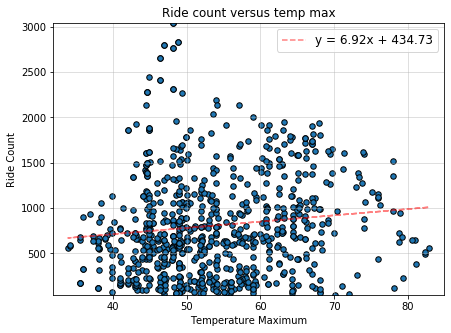

In [7]:
plt_scat(combined_data_df['temp_max'], combined_data_df['Ride_count'], "Temperature Maximum", "Ride Count", "Ride count versus temp max")